# Census Data Comparison

We will be looking at census data on Wikipedia and StatsCan for our areas of interest

## Imports

In [11]:
import pandas as pd
import re
#from stats_can import StatsCan
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Get tables off wikipedia
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_municipalities_in_Ontario")
tables[0].head(2)

Name[12] Municipalsub-type[6] 2021 Census of Population[4]  \
   Name[12] Municipalsub-type[6]             Population(2021)   
0  Bruce[c]               County                        72017   
1  Dufferin               County                        66257   

                                                                  
  Population(2016) Change Land area(km2) Populationdensity(/km2)  
0            66491  +8.3%        3965.28                    18.2  
1            61735  +7.3%        1486.77                    44.6

In [103]:
# Load required tables
up_mun = tables[0].copy() # Upper tier municipality
low_mun = tables[1].copy() # lower tier

def rename_columns(df):
    old_col = list(df.columns)
    new_col = [re.split("\[", x[1])[0] for x in old_col]
    df.columns = new_col
    return df

def convert_percentage(per):
    if type(per) == str:
        pos_neg = 1
        if per[0] == "−":
            pos_neg = (-1)
        return (pos_neg * float(per[1:len(per)-1]))
    else:
        return per

def remove_subscripts(name):
    if type(name) == str:
        return re.sub('\[.*\]', "", name)
    else:
        return name
    

def clean_tables(df):
    df = rename_columns(df)
    df['Change'] = df['Change'].map(convert_percentage)
    df['Name'] = df['Name'].apply(remove_subscripts)
    return df


up_mun = clean_tables(up_mun)
low_mun = clean_tables(low_mun)
low_mun.head()

,Name,Status,CSD type,Census division,Population(2021),Population(2016),Change,Land area(km2),Populationdensity(/km2)
0,Addington Highlands,Lower-tier,Township,Lennox and Addington,2534,2318,9.3,1293.99,2.0
1,Adelaide Metcalfe,Lower-tier,Township,Middlesex,3011,2990,0.7,331.11,9.1
2,Adjala-Tosorontio,Lower-tier,Township,Simcoe,10989,10975,0.1,371.53,29.6
3,Admaston/Bromley,Lower-tier,Township,Renfrew,2995,2935,2.0,519.59,5.8
4,Ajax,Lower-tier,Town,Durham,126666,119677,5.8,66.64,1900.8
...,...,...,...,...,...,...,...,...,...
411,Woodstock,Lower-tier,City,Oxford,46705,41098,13.6,56.46,827.2
412,Woolwich,Lower-tier,Township,Waterloo,26999,25006,8.0,326.56,82.7
413,Zorra,Lower-tier,Township,Oxford,8628,8138,6.0,529.19,16.3
414,Total local (single and lower-tier) municipali...,Total local (single and lower-tier) municipali...,Total local (single and lower-tier) municipali...,Total local (single and lower-tier) municipali...,14134681,13357280,5.8,154274.36,91.6


In [149]:
# Load locations of interest
locations_df = pd.read_csv("Data/Locations of interest.csv", index_col=0)
locations_df.head()

,News Site,City,Province,Name,Census division,Health Unit
0,BarrieToday,Barrie,Ontario,Barrie,Simcoe,NaN
1,BayToday,North Bay,Ontario,North Bay,Nipissing,NaN
2,BradfordToday,Bradford,Ontario,Bradford West Gwillimbury,Simcoe,NaN
3,BurlingtonToday,Burlington,Ontario,Burlington,Halton,NaN
4,CambridgeToday,Cambridge,Ontario,Cambridge,Waterloo,NaN
5,CollingwoodToday,Collingwood,Ontario,Collingwood,Simcoe,NaN
6,ElliotLakeToday,Elliot Lake,Ontario,Elliot Lake,Algoma,NaN
7,EloraFergusToday,Elora/Fergus,Ontario,Centre Wellington,Wellington,NaN
8,GuelphToday,Guelph,Ontario,Guelph,Wellington,NaN
9,HaltonHillsToday,Halton Hills,Ontario,Halton Hills,Halton,NaN


## Analysis

What is the change in population of our regions of interest?

In [150]:
low_pop_data = locations_df.merge(low_mun, how='left', on='Name')

In [151]:
ontario_change = low_mun[low_mun['Name'] == 'Province of Ontario']['Change'].iloc[0]

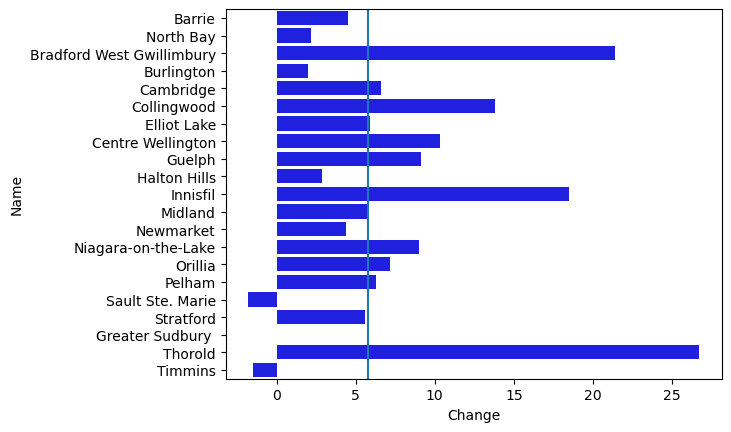

In [152]:
df = low_pop_data

fig, ax = plt.subplots()

y = df['Name']
x = df['Change']

sns.barplot(x=x, y=y,
            label="Population Change", color="b")

# Give change in Ontario population
ontario_change = low_mun[low_mun['Name'] == 'Province of Ontario']['Change'].iloc[0]
ax.axvline(x = ontario_change)
#plt.annotate('Ontario', xy = (y.iloc[int(len(df)/2)], ontario_change))

In [153]:
df['Name'].iloc[int(len(df)/2)]

'Innisfil'

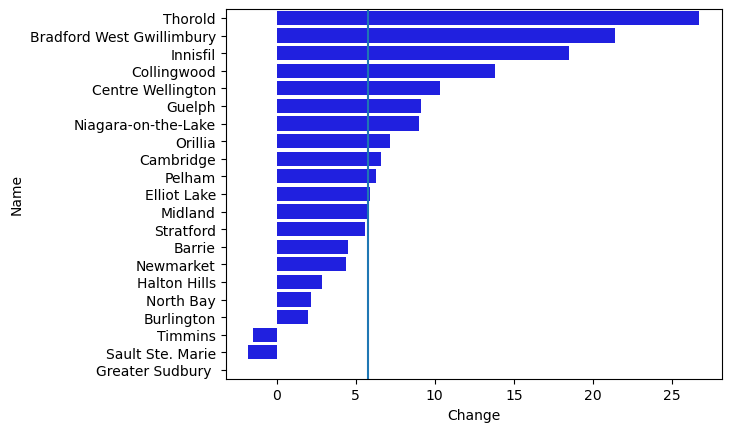

In [154]:
df = low_pop_data[['Name','Change']].copy()
df = df.sort_values('Change', ascending=False)

fig, ax = plt.subplots()

y = df['Name']
x = df['Change']

sns.barplot(x=x, y=y,
            label="Population Change", color="b")

# Give change in Ontario population
ontario_change = low_mun[low_mun['Name'] == 'Province of Ontario']['Change'].iloc[0]
ax.axvline(x = ontario_change)
fig.savefig("2016-2021 population change %.png")

In [155]:
low_pop_data

,News Site,City,Province,Name,Census division_x,Health Unit,Status,CSD type,Census division_y,Population(2021),Population(2016),Change,Land area(km2),Populationdensity(/km2)
0,BarrieToday,Barrie,Ontario,Barrie,Simcoe,NaN,Single-tier,City,Simcoe,147829.0,141434.0,4.5,99.01,1493.1
1,BayToday,North Bay,Ontario,North Bay,Nipissing,NaN,Single-tier,City,Nipissing,52662.0,51553.0,2.2,315.53,166.9
2,BradfordToday,Bradford,Ontario,Bradford West Gwillimbury,Simcoe,NaN,Lower-tier,Town,Simcoe,42880.0,35325.0,21.4,200.68,213.7
3,BurlingtonToday,Burlington,Ontario,Burlington,Halton,NaN,Lower-tier,City,Halton,186948.0,183314.0,2.0,186.12,1004.4
4,CambridgeToday,Cambridge,Ontario,Cambridge,Waterloo,NaN,Lower-tier,City,Waterloo,138479.0,129920.0,6.6,112.99,1225.6
5,CollingwoodToday,Collingwood,Ontario,Collingwood,Simcoe,NaN,Lower-tier,Town,Simcoe,24811.0,21793.0,13.8,33.15,748.4
6,ElliotLakeToday,Elliot Lake,Ontario,Elliot Lake,Algoma,NaN,Single-tier,City,Algoma,11372.0,10741.0,5.9,696.06,16.3
7,EloraFergusToday,Elora/Fergus,Ontario,Centre Wellington,Wellington,NaN,Lower-tier,Township,Wellington,31093.0,28191.0,10.3,409.41,75.9
8,GuelphToday,Guelph,Ontario,Guelph,Wellington,NaN,Single-tier,City,Wellington,143740.0,131794.0,9.1,87.43,1644.1
9,HaltonHillsToday,Halton Hills,Ontario,Halton Hills,Halton,NaN,Lower-tier,Town,Halton,62951.0,61161.0,2.9,276.81,227.4
